In [1]:
import requests
import pandas as pd

url = "https://pokeapi.co/api/v2/pokemon?limit=100"
data = requests.get(url).json()

pokemon_list = []

for p in data['results']:
    details = requests.get(p['url']).json()
    pokemon_list.append({
        "name": details['name'],
        "height": details['height'],
        "weight": details['weight'],
        "base_experience": details['base_experience']
    })

df_pokemon = pd.DataFrame(pokemon_list)


C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_pokemon

,name,height,weight,base_experience
0,bulbasaur,7,69,64
1,ivysaur,10,130,142
2,venusaur,20,1000,236
3,charmander,6,85,62
4,charmeleon,11,190,142
...,...,...,...,...
95,drowzee,10,324,66
96,hypno,16,756,169
97,krabby,4,65,65
98,kingler,13,600,166


In [3]:
url = "https://disease.sh/v3/covid-19/countries"
covid_data = requests.get(url).json()

df_covid = pd.DataFrame([{
    "country": c["country"],
    "cases": c["cases"],
    "deaths": c["deaths"],
    "recovered": c["recovered"],
    "population": c["population"]
} for c in covid_data])


In [4]:
df_covid

,country,cases,deaths,recovered,population
0,Afghanistan,234174,7996,211080,40754388
1,Albania,334863,3605,330233,2866374
2,Algeria,272010,6881,183061,45350148
3,Andorra,48015,165,0,77463
4,Angola,107327,1937,103419,35027343
...,...,...,...,...,...
226,Wallis and Futuna,3550,8,438,10982
227,Western Sahara,10,1,9,626161
228,Yemen,11945,2159,9124,31154867
229,Zambia,349304,4069,341316,19470234


In [5]:
import sqlite3

In [6]:
conn = sqlite3.connect("project.db")
df_pokemon.to_sql("pokemon", conn, if_exists="replace", index=False)
df_covid.to_sql("covid_stats", conn, if_exists="replace", index=False)

231

In [7]:
df_pokemon.to_csv("pokemon_data.csv", index=False)
df_covid.to_csv("covid_data.csv", index=False)

In [8]:
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())




[('pokemon',), ('covid_stats',)]


Pokemon SQL Queries:

In [9]:
query1 =""" SELECT name, base_experience
FROM pokemon
ORDER BY base_experience DESC
LIMIT 10; """

pd.read_sql(query1, conn)

,name,base_experience
0,charizard,240
1,blastoise,239
2,venusaur,236
3,poliwrath,230
4,nidoqueen,227
5,nidoking,227
6,machamp,227
7,alakazam,225
8,gengar,225
9,golem,223


In [10]:
query2 = """
SELECT AVG(height) AS avg_height, AVG(weight) AS avg_weight
FROM pokemon;
"""

pd.read_sql(query2, conn)


,avg_height,avg_weight
0,11.06,383.92


In [11]:
query3 = """
SELECT name, weight,
       NTILE(4) OVER (ORDER BY weight) AS weight_quartile
FROM pokemon;
"""

pd.read_sql(query3, conn)


,name,weight,weight_quartile
0,gastly,1,1
1,haunter,1,1
2,diglett,8,1
3,pidgey,18,1
4,spearow,20,1
...,...,...,...
95,machamp,1300,4
96,cloyster,1325,4
97,arcanine,1550,4
98,onix,2100,4


In [12]:
query4 = """
SELECT name, height,
       DENSE_RANK() OVER (ORDER BY height DESC) AS height_rank
FROM pokemon;
"""

pd.read_sql(query4, conn)


,name,height,height_rank
0,onix,88,1
1,arbok,35,2
2,venusaur,20,3
3,ekans,20,3
4,arcanine,19,4
...,...,...,...
95,spearow,3,20
96,paras,3,20
97,magnemite,3,20
98,shellder,3,20


In [13]:
query5 = """
SELECT name, weight
FROM pokemon
WHERE weight > (SELECT AVG(weight) FROM pokemon);
"""

pd.read_sql(query5, conn)


,name,weight
0,venusaur,1000
1,charizard,905
2,blastoise,855
3,pidgeot,395
4,arbok,650
5,nidoqueen,600
6,nidoking,620
7,clefable,400
8,golbat,550
9,golduck,766


In [14]:
query6 = """
SELECT name, base_experience
FROM pokemon
WHERE base_experience >
      (SELECT AVG(base_experience) FROM pokemon);
"""

pd.read_sql(query6, conn)


,name,base_experience
0,ivysaur,142
1,venusaur,236
2,charmeleon,142
3,charizard,240
4,wartortle,142
5,blastoise,239
6,butterfree,178
7,beedrill,178
8,pidgeot,216
9,raticate,145


In [15]:
query7 = """
SELECT name, weight,
       RANK() OVER (ORDER BY weight DESC) AS weight_rank
FROM pokemon;
"""

pd.read_sql(query7, conn)


,name,weight,weight_rank
0,golem,3000,1
1,onix,2100,2
2,arcanine,1550,3
3,cloyster,1325,4
4,machamp,1300,5
...,...,...,...
95,spearow,20,96
96,pidgey,18,97
97,diglett,8,98
98,gastly,1,99


In [16]:
query8 = """
SELECT
  CASE
    WHEN weight > 500 THEN 'Heavy'
    WHEN weight BETWEEN 200 AND 500 THEN 'Medium'
    ELSE 'Light'
  END AS weight_category,
  COUNT(*) AS pokemon_count
FROM pokemon
GROUP BY weight_category;

"""

pd.read_sql(query8, conn)


,weight_category,pokemon_count
0,Heavy,26
1,Light,47
2,Medium,27


In [17]:
query9 = """
SELECT name, weight*1.0/height AS ratio
FROM pokemon
WHERE height > 0;
"""

pd.read_sql(query9, conn)


,name,ratio
0,bulbasaur,9.857143
1,ivysaur,13.000000
2,venusaur,50.000000
3,charmander,14.166667
4,charmeleon,17.272727
...,...,...
95,drowzee,32.400000
96,hypno,47.250000
97,krabby,16.250000
98,kingler,46.153846


In [18]:
query10 = """
SELECT name, weight*1.0/height AS ratio
FROM pokemon
WHERE height > 0
ORDER BY ratio DESC
LIMIT 5;
"""

pd.read_sql(query10, conn)


,name,ratio
0,golem,214.285714
1,graveler,105.000000
2,cloyster,88.333333
3,seel,81.818182
4,arcanine,81.578947


Covid SQL Queries:

In [19]:
query11 = """
SELECT country, cases
FROM covid_stats
ORDER BY cases DESC
LIMIT 10;
"""
pd.read_sql(query11, conn)


,country,cases
0,USA,111820082
1,India,45035393
2,France,40138560
3,Germany,38828995
4,Brazil,38743918
5,S. Korea,34571873
6,Japan,33803572
7,Italy,26723249
8,UK,24910387
9,Russia,24124215


In [20]:
query12 = """
SELECT country,
       (deaths * 100.0 / cases) AS death_rate
FROM covid_stats
WHERE cases > 0;
"""
pd.read_sql(query12, conn)


,country,death_rate
0,Afghanistan,3.414555
1,Albania,1.076560
2,Algeria,2.529686
3,Andorra,0.343643
4,Angola,1.804765
...,...,...
226,Wallis and Futuna,0.225352
227,Western Sahara,10.000000
228,Yemen,18.074508
229,Zambia,1.164888


In [21]:
query13 = """
SELECT country,
       (recovered * 100.0 / cases) AS recovery_rate
FROM covid_stats
WHERE cases > 0;
"""
pd.read_sql(query13, conn)


,country,recovery_rate
0,Afghanistan,90.138102
1,Albania,98.617345
2,Algeria,67.299364
3,Andorra,0.000000
4,Angola,96.358791
...,...,...
226,Wallis and Futuna,12.338028
227,Western Sahara,90.000000
228,Yemen,76.383424
229,Zambia,97.713167


In [22]:
query14 = """
SELECT country, cases
FROM covid_stats
WHERE cases > (SELECT AVG(cases) FROM covid_stats);
"""
pd.read_sql(query14, conn)


,country,cases
0,Argentina,10128845
1,Australia,11853144
2,Austria,6081287
3,Belgium,4861695
4,Brazil,38743918
5,Canada,4946090
6,Chile,5384853
7,Colombia,6400173
8,Czechia,4759041
9,Denmark,3183756


In [23]:
query15 = """
SELECT country,
       (cases * 1000000.0 / population) AS cases_per_million
FROM covid_stats;
"""
pd.read_sql(query15, conn)


,country,cases_per_million
0,Afghanistan,5745.982494
1,Albania,116824.601395
2,Algeria,5997.995861
3,Andorra,619844.312769
4,Angola,3064.091958
...,...,...
226,Wallis and Futuna,323256.237480
227,Western Sahara,15.970334
228,Yemen,383.407190
229,Zambia,17940.410988


In [24]:
query16 = """
SELECT country, deaths,
       RANK() OVER (ORDER BY deaths DESC) AS death_rank
FROM covid_stats;
"""
pd.read_sql(query16, conn)


,country,deaths,death_rank
0,USA,1219487,1
1,Brazil,711380,2
2,India,533570,3
3,Russia,402756,4
4,Mexico,334958,5
...,...,...,...
226,Falkland Islands (Malvinas),0,227
227,Holy See (Vatican City State),0,227
228,Niue,0,227
229,Saint Helena,0,227


In [25]:
query17 = """
SELECT country, population,
       NTILE(4) OVER (ORDER BY population) AS population_quartile
FROM covid_stats;
"""
pd.read_sql(query17, conn)


,country,population,population_quartile
0,Diamond Princess,0,1
1,MS Zaandam,0,1
2,Holy See (Vatican City State),799,1
3,Tokelau,1378,1
4,Niue,1622,1
...,...,...,...
226,Pakistan,229488994,4
227,Indonesia,279134505,4
228,USA,334805269,4
229,India,1406631776,4


In [26]:
query18 = """
SELECT
  CASE
    WHEN deaths*1.0/cases > 0.03 THEN 'High Mortality'
    WHEN deaths*1.0/cases BETWEEN 0.01 AND 0.03 THEN 'Medium Mortality'
    ELSE 'Low Mortality'
  END AS mortality_category,
  COUNT(*) AS country_count
FROM covid_stats
WHERE cases > 0
GROUP BY mortality_category;
"""
pd.read_sql(query18, conn)


,mortality_category,country_count
0,High Mortality,15
1,Low Mortality,126
2,Medium Mortality,90


In [27]:
query19 = """
SELECT country, deaths
FROM covid_stats
WHERE deaths < (SELECT AVG(deaths) FROM covid_stats);
"""
pd.read_sql(query19, conn)


,country,deaths
0,Afghanistan,7996
1,Albania,3605
2,Algeria,6881
3,Andorra,165
4,Angola,1937
...,...,...
191,Wallis and Futuna,8
192,Western Sahara,1
193,Yemen,2159
194,Zambia,4069


In [28]:
query20 = """
SELECT country, population, cases
FROM covid_stats
ORDER BY population DESC;
"""
pd.read_sql(query20, conn)


,country,population,cases
0,China,1448471400,503302
1,India,1406631776,45035393
2,USA,334805269,111820082
3,Indonesia,279134505,6829221
4,Pakistan,229488994,1581936
...,...,...,...
226,Niue,1622,1059
227,Tokelau,1378,80
228,Holy See (Vatican City State),799,29
229,Diamond Princess,0,712


In [29]:
#Additional Queries


21.Pokemon classified by experience level

In [30]:
query21 = """
SELECT
  CASE
    WHEN base_experience >= 200 THEN 'High Experience'
    WHEN base_experience BETWEEN 100 AND 199 THEN 'Medium Experience'
    ELSE 'Low Experience'
  END AS experience_level,
  COUNT(*) AS pokemon_count
FROM pokemon
GROUP BY experience_level;
"""

pd.read_sql(query1, conn)


,name,base_experience
0,charizard,240
1,blastoise,239
2,venusaur,236
3,poliwrath,230
4,nidoqueen,227
5,nidoking,227
6,machamp,227
7,alakazam,225
8,gengar,225
9,golem,223


22.Pokémon with top 25% weight

In [31]:
query22 = """
SELECT name, weight
FROM pokemon
WHERE weight >= (
    SELECT MIN(weight)
    FROM (
        SELECT weight
        FROM pokemon
        ORDER BY weight DESC
        LIMIT (SELECT COUNT(*) * 0.25 FROM pokemon)
    )
);
"""

pd.read_sql(query2, conn)


,avg_height,avg_weight
0,11.06,383.92


23.Countries with highest cases per million (Top 10)

In [32]:
query23 = """
SELECT country,
       (cases * 1000000.0 / population) AS cases_per_million
FROM covid_stats
WHERE population > 0
ORDER BY cases_per_million DESC
LIMIT 10;
"""

pd.read_sql(query3, conn)


,name,weight,weight_quartile
0,gastly,1,1
1,haunter,1,1
2,diglett,8,1
3,pidgey,18,1
4,spearow,20,1
...,...,...,...
95,machamp,1300,4
96,cloyster,1325,4
97,arcanine,1550,4
98,onix,2100,4


24.Countries grouped by outbreak severity

In [33]:
query24 = """
SELECT
  CASE
    WHEN cases > 10000000 THEN 'Severe Outbreak'
    WHEN cases BETWEEN 1000000 AND 10000000 THEN 'Moderate Outbreak'
    ELSE 'Low Outbreak'
  END AS outbreak_severity,
  COUNT(*) AS country_count
FROM covid_stats
GROUP BY outbreak_severity;
"""

pd.read_sql(query4, conn)


,name,height,height_rank
0,onix,88,1
1,arbok,35,2
2,venusaur,20,3
3,ekans,20,3
4,arcanine,19,4
...,...,...,...
95,spearow,3,20
96,paras,3,20
97,magnemite,3,20
98,shellder,3,20


Exploratory Data Analysis (EDA)

In [34]:
df_pokemon

,name,height,weight,base_experience
0,bulbasaur,7,69,64
1,ivysaur,10,130,142
2,venusaur,20,1000,236
3,charmander,6,85,62
4,charmeleon,11,190,142
...,...,...,...,...
95,drowzee,10,324,66
96,hypno,16,756,169
97,krabby,4,65,65
98,kingler,13,600,166


In [35]:
df_pokemon.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             100 non-null    object
 1   height           100 non-null    int64 
 2   weight           100 non-null    int64 
 3   base_experience  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


In [36]:
df_pokemon.describe()


,height,weight,base_experience
count,100.000000,100.000000,100.000000
mean,11.060000,383.920000,125.260000
std,9.363393,459.783275,62.301097
min,2.000000,1.000000,39.000000
25%,6.000000,89.000000,62.750000
50%,10.000000,212.500000,136.000000
75%,14.000000,542.500000,172.750000
max,88.000000,3000.000000,240.000000


In [37]:
df_pokemon.isnull().sum()

name               0
height             0
weight             0
base_experience    0
dtype: int64

In [38]:
import matplotlib.pyplot as plt


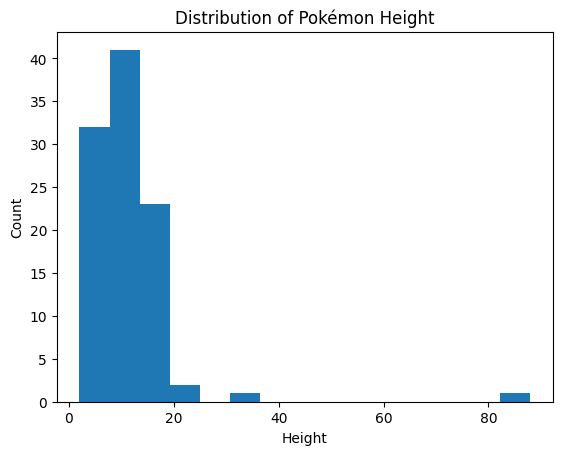

In [39]:
plt.hist(df_pokemon['height'], bins=15)
plt.xlabel("Height")
plt.ylabel("Count")
plt.title("Distribution of Pokémon Height")
plt.show()


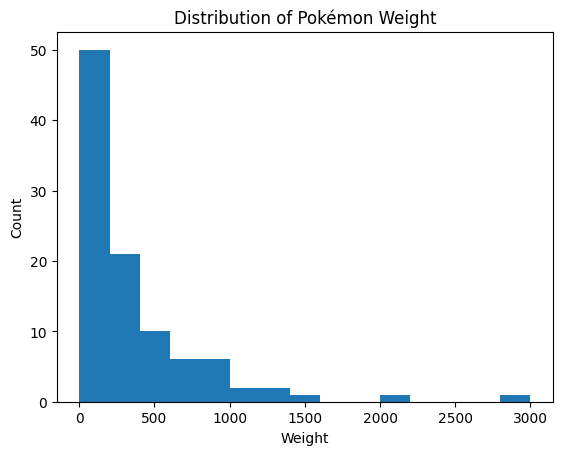

In [40]:
plt.hist(df_pokemon['weight'], bins=15)
plt.xlabel("Weight")
plt.ylabel("Count")
plt.title("Distribution of Pokémon Weight")
plt.show()


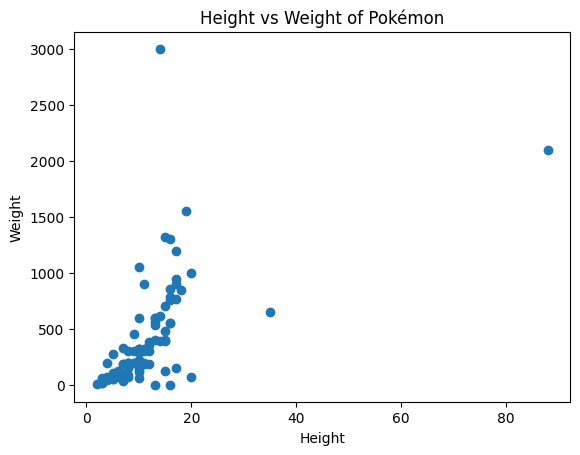

In [41]:
plt.scatter(df_pokemon['height'], df_pokemon['weight'])
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight of Pokémon")
plt.show()


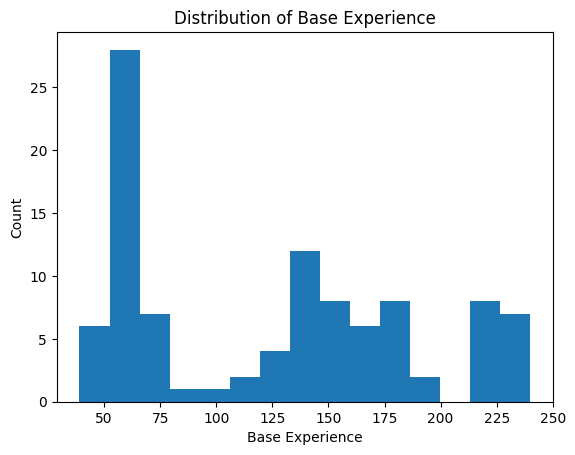

In [42]:
plt.hist(df_pokemon['base_experience'].dropna(), bins=15)
plt.xlabel("Base Experience")
plt.ylabel("Count")
plt.title("Distribution of Base Experience")
plt.show()


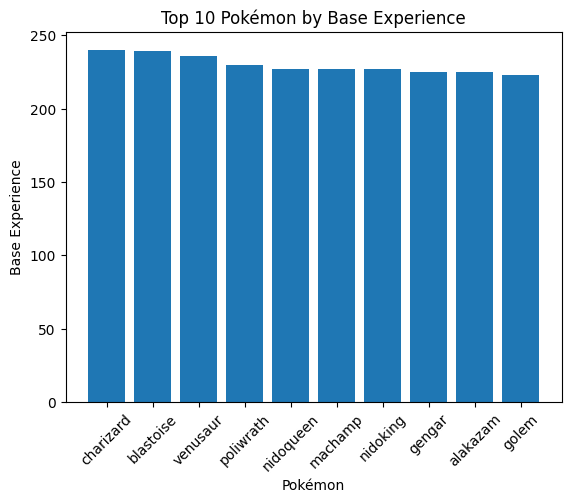

In [43]:
top_exp = df_pokemon.sort_values('base_experience', ascending=False).head(10)

plt.bar(top_exp['name'], top_exp['base_experience'])
plt.xticks(rotation=45)
plt.xlabel("Pokémon")
plt.ylabel("Base Experience")
plt.title("Top 10 Pokémon by Base Experience")
plt.show()


In [44]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     231 non-null    object
 1   cases       231 non-null    int64 
 2   deaths      231 non-null    int64 
 3   recovered   231 non-null    int64 
 4   population  231 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.1+ KB


In [45]:
df_covid.describe()

,cases,deaths,recovered,population
count,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02
mean,3.050883e+06,3.034927e+04,2.426700e+06,3.439366e+07
std,1.002125e+07,1.092314e+05,9.196220e+06,1.380709e+08
min,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.636600e+04,1.855000e+02,2.189500e+03,4.281115e+05
50%,2.068970e+05,1.974000e+03,5.894700e+04,5.554960e+06
75%,1.348198e+06,1.428700e+04,1.032544e+06,2.183934e+07
max,1.118201e+08,1.219487e+06,1.098144e+08,1.448471e+09


In [46]:
df_covid.isnull().sum()


country       0
cases         0
deaths        0
recovered     0
population    0
dtype: int64

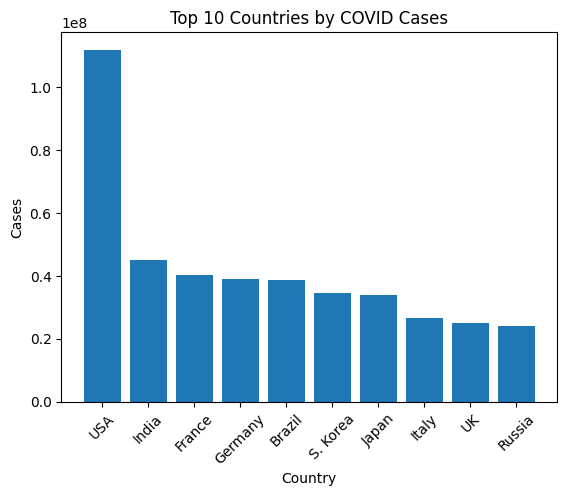

In [47]:
top_cases = df_covid.sort_values('cases', ascending=False).head(10)

plt.bar(top_cases['country'], top_cases['cases'])
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Cases")
plt.title("Top 10 Countries by COVID Cases")
plt.show()


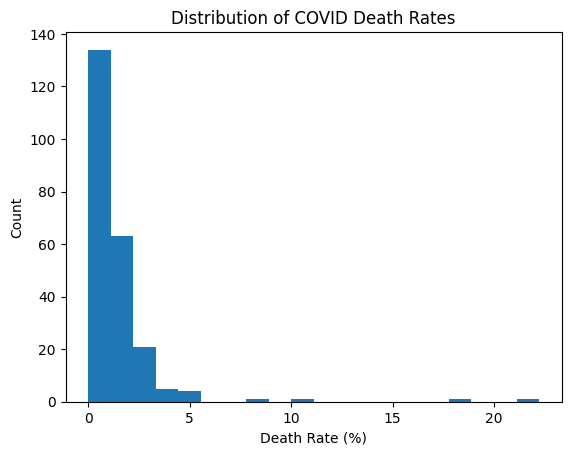

In [48]:
df_covid['death_rate'] = (df_covid['deaths'] / df_covid['cases']) * 100

plt.hist(df_covid['death_rate'].dropna(), bins=20)
plt.xlabel("Death Rate (%)")
plt.ylabel("Count")
plt.title("Distribution of COVID Death Rates")
plt.show()


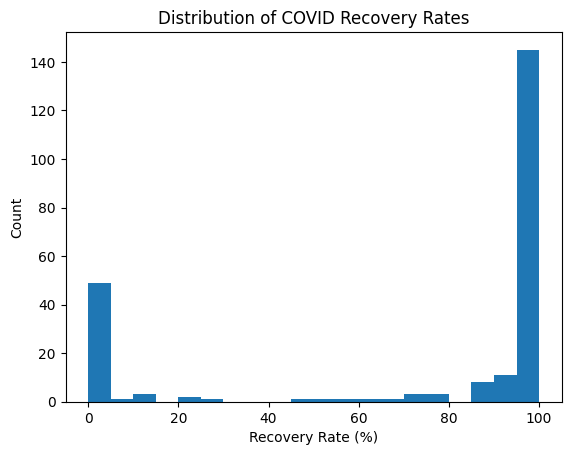

In [49]:
df_covid['recovery_rate'] = (df_covid['recovered'] / df_covid['cases']) * 100

plt.hist(df_covid['recovery_rate'].dropna(), bins=20)
plt.xlabel("Recovery Rate (%)")
plt.ylabel("Count")
plt.title("Distribution of COVID Recovery Rates")
plt.show()


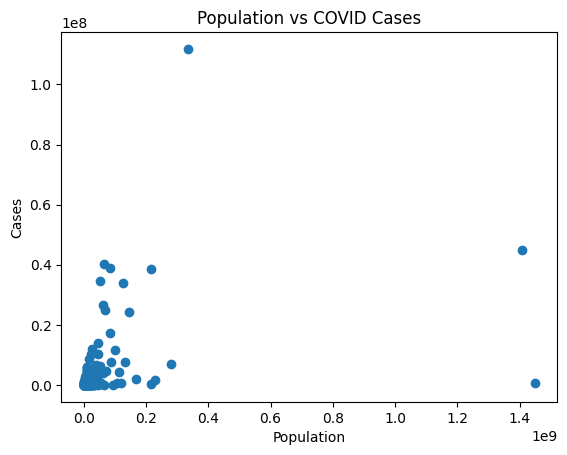

In [50]:
plt.scatter(df_covid['population'], df_covid['cases'])
plt.xlabel("Population")
plt.ylabel("Cases")
plt.title("Population vs COVID Cases")
plt.show()


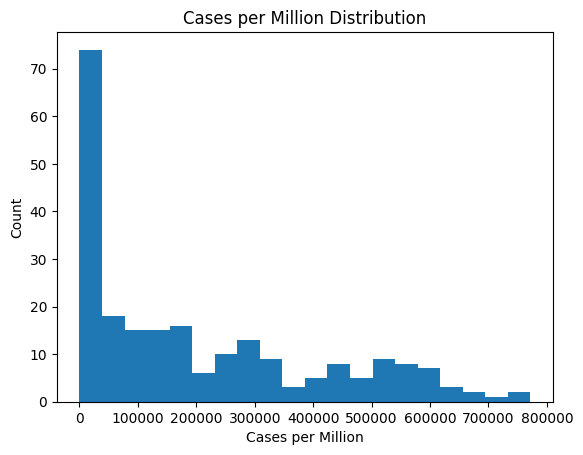

In [51]:
import numpy as np
import matplotlib.pyplot as plt


df_covid['cases_per_million'] = (
    df_covid['cases'] / df_covid['population']
) * 1_000_000


df_covid['cases_per_million'] = (
    df_covid['cases_per_million']
    .replace([np.inf, -np.inf], np.nan)
    .dropna()
)

plt.hist(df_covid['cases_per_million'], bins=20)
plt.xlabel("Cases per Million")
plt.ylabel("Count")
plt.title("Cases per Million Distribution")
plt.show()
